# Shubh Sinha - 210968172

### WEEK 04 Exercise 01

### Importing necessary lib

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.optimizers import Adam
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
import os
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout

### One time extraction step

In [3]:
import os
# import zipfile

# local_zip = '/home/mca/Desktop/cats_dogs_filtered.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/home/mca/Desktop')
# zip_ref.close()

### Rescaling and directory initialization

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
base_dir = 'C:/Users/Shubh/Desktop/cats_and_dogs_filtered'
train_dir='C:/Users/Shubh/Desktop/cats_and_dogs_filtered/train'
validation_dir='C:/Users/Shubh/Desktop/cats_and_dogs_filtered/validation'
train_cats=train_dir+'/cats'
train_dogs=train_dir+'/dogs'
validation_cats=validation_dir+'/cats'
validation_dogs=validation_dir+'/dogs'

In [6]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224), 
        batch_size=20,
        class_mode='categorical')

Found 2000 images belonging to 2 classes.


In [7]:
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

Found 1000 images belonging to 2 classes.


In [9]:
test_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

Found 1000 images belonging to 2 classes.


In [11]:
train_cat_fnames = os.listdir(train_cats)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


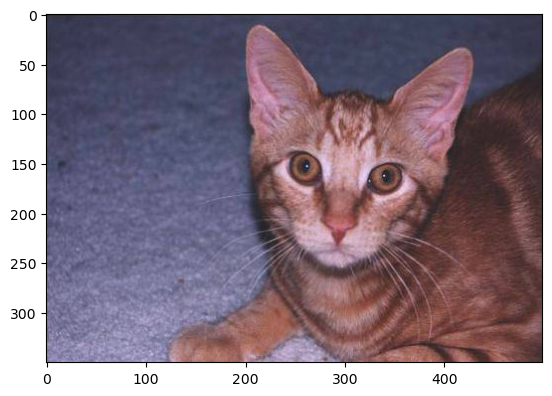

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.imshow(mpimg.imread(os.path.join(train_cats, train_cat_fnames[10])))

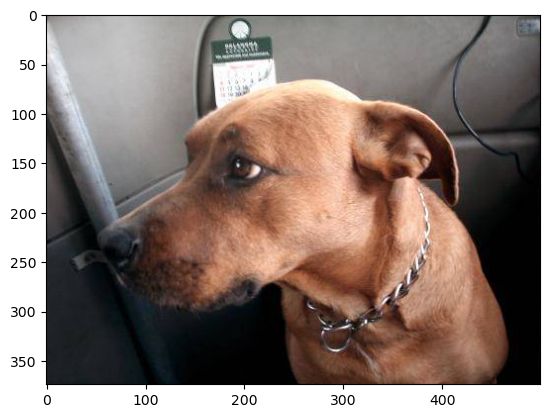

In [16]:
plt.imshow(mpimg.imread(os.path.join(train_dogs, train_dog_fnames[148])))

## Define all the models

In [103]:
def LeNet5():
    model = tf.keras.Sequential([
        Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(16, kernel_size=(5, 5), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(120, activation='relu'),
        Dense(84, activation='relu'),
        Dense(2, activation='softmax')
    ])
    return model

In [104]:
model = LeNet5()
model.compile(optimizer=Adam(learning_rate=0.000001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history=model.fit(train_generator, validation_data=validation_generator, epochs=30)




Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_197 (Conv2D)         (None, 220, 220, 6)       456       
                                                                 
 max_pooling2d_81 (MaxPoolin  (None, 110, 110, 6)      0         
 g2D)                                                            
                                                                 
 conv2d_198 (Conv2D)         (None, 106, 106, 16)      2416      
                                                                 
 max_pooling2d_82 (MaxPoolin  (None, 53, 53, 16)       0         
 g2D)                                                            
                                                                 
 flatten_38 (Flatten)        (None, 44944)             0         
                                                                 
 dense_98 (Dense)            (None, 120)             

In [105]:
model.evaluate(test_generator, batch_size=32)

50/50 [==============================] - 3s 52ms/step - loss: 0.6616 - accuracy: 0.6032


[0.6616031527519226, 0.6032063961029053]

In [106]:
def AlexNet():
    model = tf.keras.Sequential([
        Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D((3, 3), strides=(2, 2)),
        Conv2D(256, (5, 5), padding='same', activation='relu'),
        MaxPooling2D((3, 3), strides=(2, 2)),
        Conv2D(384, (3, 3), padding='same', activation='relu'),
        Conv2D(384, (3, 3), padding='same', activation='relu'),
        Conv2D(256, (3, 3), padding='same', activation='relu'),
        MaxPooling2D((3, 3), strides=(2, 2)),
        Flatten(),
        Dense(4096, activation='relu'),
        Dense(4096, activation='relu'),
        Dense(2, activation='softmax')
    ])
    return model

model = AlexNet()
model.compile(optimizer=Adam(learning_rate=0.000001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history=model.fit(train_generator, validation_data=validation_generator, epochs=30)
model.evaluate(test_generator, batch_size=32)

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_199 (Conv2D)         (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d_83 (MaxPoolin  (None, 26, 26, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_200 (Conv2D)         (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_84 (MaxPoolin  (None, 12, 12, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_201 (Conv2D)         (None, 12, 12, 384)       885120    
                                                                 
 conv2d_202 (Conv2D)         (None, 12, 12, 384)     

[0.6348465085029602, 0.6392785310745239]

In [107]:
from keras.applications.vgg16 import VGG16
base_model = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model.trainable = False #freeze the layers
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [108]:
model=Sequential([
    base_model,
    Flatten(),
    Dense(2, activation='softmax'),
])
model.summary()
model.compile(optimizer=Adam(learning_rate=0.000001), loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_generator, validation_data=validation_generator, epochs=30)
model.evaluate(test_generator, batch_size=32)

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_40 (Flatten)        (None, 25088)             0         
                                                                 
 dense_104 (Dense)           (None, 2)                 50178     
                                                                 
Total params: 14,764,866
Trainable params: 50,178
Non-trainable params: 14,714,688
_________________________________________________________________
Epoch 1/30
76/76 [==============================] - 12s 138ms/step - loss: 0.7161 - accuracy: 0.5143 - val_loss: 0.7196 - val_accuracy: 0.5300
Epoch 2/30
76/76 [==============================] - 10s 135ms/step - loss: 0.7038 - accuracy: 0.5435 - val_loss: 0.7091 - val_accuracy: 0.5460
Epoch 3/30
76/

[0.5401743650436401, 0.7474949955940247]

In [109]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False
base_model.summary()
model=Sequential([
    base_model,
    MaxPooling2D(),
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(2, activation='softmax'),
    ])
model.summary()
model.compile(optimizer=Adam(learning_rate=0.000001), loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_generator, validation_data=validation_generator, epochs=30)
model.evaluate(test_generator, batch_size=32)

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_204 (Conv2D)            (None, 111, 111, 32  864         ['input_10[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_204[0][0]']             
 ormalization)                  )                                                      

[0.05454057827591896, 0.9829659461975098]

In [110]:
from tensorflow.keras.applications import ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False
base_model.summary()
model=Sequential([
  base_model,
  MaxPooling2D(),
  Flatten(),
  Dense(1024, activation='relu'),
  Dense(2, activation='softmax'),
])
model.summary()
model.compile(optimizer=Adam(learning_rate=0.000001), loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_generator, validation_data=validation_generator, epochs=30)
model.evaluate(test_generator, batch_size=32)

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_11[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

[0.639354407787323, 0.6322645545005798]

In [111]:
from tensorflow.keras.applications import EfficientNetB0
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False
base_model.summary()
model=Sequential([
  base_model,
  MaxPooling2D(),
  Flatten(),
  Dense(1024, activation='relu'),
  Dense(2, activation='softmax'),
])
model.summary()
model.compile(optimizer=Adam(learning_rate=0.000001), loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_generator, validation_data=validation_generator, epochs=30)
model.evaluate(test_generator, batch_size=32)

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 224, 224, 3)  0           ['input_12[0][0]']               
                                                                                                  
 normalization_1 (Normalization  (None, 224, 224, 3)  7          ['rescaling_2[0][0]']            
 )                                                                                                
                                                                                     

[0.692633330821991, 0.5]

In [112]:
from tensorflow.keras.applications import MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False
base_model.summary()
model=Sequential([
  base_model,
  MaxPooling2D(),
  Flatten(),
  Dense(1024, activation='relu'),
  Dense(2, activation='softmax'),
])
model.summary()
model.compile(optimizer=Adam(learning_rate=0.000001), loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_generator, validation_data=validation_generator, epochs=30)
model.evaluate(test_generator, batch_size=32)

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_13[0][0]']               
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

[0.08627984672784805, 0.968937873840332]